### Sri Lankan Cricketers Classification

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import io

#### (1) Preprocessing: Detect face and eyes
Most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in pre-processing pipeline is to detect faces from an image. Once face is detected , then detect eyes, if two eyes are detected then only keep that image otherwise discard it

In [28]:
img = cv2.imread('./test_images/jayasuriya.jpg')
img.shape

(500, 750, 3)

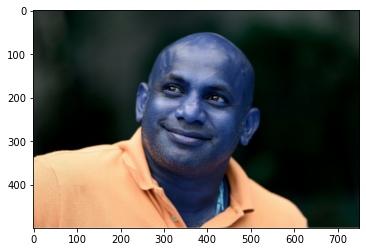

In [29]:
plt.imshow(img)

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 750)

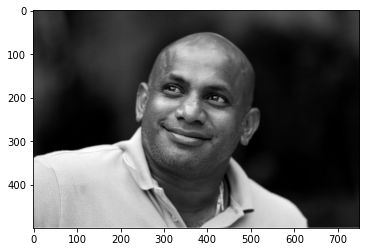

In [31]:
plt.imshow(gray, cmap='gray')

In [32]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[223,  72, 297, 297]], dtype=int32)

In [33]:
(x,y,w,h) = faces[0]
x,y,w,h

(223, 72, 297, 297)

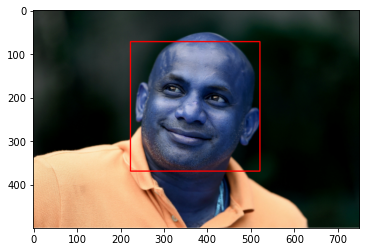

In [34]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

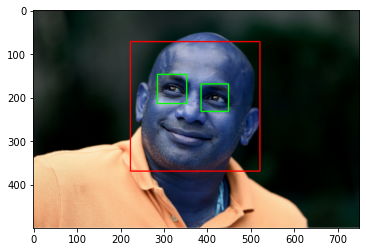

In [37]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()